In [36]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [27]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
# from keras import layers, models, optimizers
# from keras import backend as K

In [28]:
ann_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/"
img_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/"

In [29]:
img=[img_DIR+i for i in os.listdir(img_DIR)] 
ann=[ann_DIR+i for i in os.listdir(ann_DIR)] 

In [ ]:
img[0]

In [31]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [34]:
with open(ann[0]) as f:
    data = json.load(f)

pprint(data)

{'description': '',
 'objects': [{'bitmap': {'np': [], 'origin': []},
              'classTitle': 'plate_bbox',
              'description': '',
              'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]],
                         'interior': []},
              'tags': [],
              'type': 'rectangle'}],
 'size': {'height': 64, 'width': 128},
 'tags': ['train']}


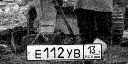

In [39]:
from IPython.display import display, Image
display(Image(filename=img[0]))